In [1]:
%matplotlib inline
from common import *
from matplotlib import pyplot as plt
import smart_open

In [2]:
with open(join(DATA_FOLDER, 'gold_mongo.json'), 'r') as f:
    gold = json.load(f)

In [3]:
def iter_docs(fnames):
    for i, fn in enumerate(fnames):
        logging.info("%s: " % i + fn)
        with GzipFile(fn, 'rb') as f:
            docs = ujson.loads(f.read())
        for k,doc in docs.items():
            yield k,doc

                
class Documents(object):
    def __init__(self, folder, tokens_only=False):
        self.folder = folder
        self.tokens_only = tokens_only
 
    def __iter__(self):
        fnames = glob(join(self.folder, '*.json.gz'))
        for k, doc in iter_docs(fnames):
            unlisted = [w for s in doc for w in s]
            if self.tokens_only:
                yield unlisted
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(unlisted, [k])

In [ ]:
folder = join(DATA_FOLDER, 'documents/')

model = Doc2Vec(Documents(), size=200, window=8, min_count=5, dm=1, workers=cpu_count-1, iter=5)

2017-10-19 17:27:08,865 [MainThread  ] [INFO ]  collecting all words and their counts
2017-10-19 17:27:08,868 [MainThread  ] [INFO ]  PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2017-10-19 17:27:17,125 [MainThread  ] [INFO ]  PROGRESS: at example #10000, processed 7999305 words (969026/s), 261892 word types, 10000 tags
2017-10-19 17:27:25,883 [MainThread  ] [INFO ]  PROGRESS: at example #20000, processed 16233872 words (940400/s), 448056 word types, 20000 tags
2017-10-19 17:27:34,229 [MainThread  ] [INFO ]  PROGRESS: at example #30000, processed 24334930 words (970749/s), 611245 word types, 30000 tags
2017-10-19 17:27:42,929 [MainThread  ] [INFO ]  PROGRESS: at example #40000, processed 32757867 words (968322/s), 766383 word types, 40000 tags
2017-10-19 17:27:51,697 [MainThread  ] [INFO ]  PROGRESS: at example #50000, processed 41013631 words (941709/s), 907126 word types, 50000 tags
2017-10-19 17:27:59,993 [MainThread  ] [INFO ]  PROGRESS: at example #60000,

2017-10-19 17:35:11,644 [MainThread  ] [INFO ]  PROGRESS: at example #560000, processed 461495477 words (965895/s), 5744105 word types, 560000 tags
2017-10-19 17:35:20,364 [MainThread  ] [INFO ]  PROGRESS: at example #570000, processed 469815266 words (954237/s), 5823440 word types, 570000 tags
2017-10-19 17:35:28,923 [MainThread  ] [INFO ]  PROGRESS: at example #580000, processed 478002674 words (956684/s), 5899829 word types, 580000 tags
2017-10-19 17:35:37,398 [MainThread  ] [INFO ]  PROGRESS: at example #590000, processed 486164549 words (963251/s), 5970853 word types, 590000 tags
2017-10-19 17:35:45,790 [MainThread  ] [INFO ]  PROGRESS: at example #600000, processed 494257119 words (964388/s), 6042305 word types, 600000 tags
2017-10-19 17:35:54,593 [MainThread  ] [INFO ]  PROGRESS: at example #610000, processed 502700964 words (959348/s), 6121881 word types, 610000 tags
2017-10-19 17:36:03,374 [MainThread  ] [INFO ]  PROGRESS: at example #620000, processed 511127263 words (959710/

2017-10-19 17:43:26,821 [MainThread  ] [INFO ]  PROGRESS: at example #1120000, processed 922285259 words (955390/s), 9543235 word types, 1120000 tags
2017-10-19 17:43:35,279 [MainThread  ] [INFO ]  PROGRESS: at example #1130000, processed 930442225 words (964570/s), 9605067 word types, 1130000 tags
2017-10-19 17:43:43,952 [MainThread  ] [INFO ]  PROGRESS: at example #1140000, processed 938734894 words (956260/s), 9663631 word types, 1140000 tags
2017-10-19 17:43:52,622 [MainThread  ] [INFO ]  PROGRESS: at example #1150000, processed 947026798 words (956519/s), 9724404 word types, 1150000 tags
2017-10-19 17:44:03,146 [MainThread  ] [INFO ]  PROGRESS: at example #1160000, processed 955314030 words (787573/s), 9785376 word types, 1160000 tags
2017-10-19 17:44:11,645 [MainThread  ] [INFO ]  PROGRESS: at example #1170000, processed 963417653 words (953548/s), 9845970 word types, 1170000 tags
2017-10-19 17:44:20,248 [MainThread  ] [INFO ]  PROGRESS: at example #1180000, processed 971674910 w

2017-10-19 17:48:51,613 [MainThread  ] [INFO ]  PROGRESS: at 0.30% examples, 428721 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:52,632 [MainThread  ] [INFO ]  PROGRESS: at 0.31% examples, 429310 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:53,705 [MainThread  ] [INFO ]  PROGRESS: at 0.32% examples, 428822 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:54,734 [MainThread  ] [INFO ]  PROGRESS: at 0.33% examples, 429710 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:55,772 [MainThread  ] [INFO ]  PROGRESS: at 0.34% examples, 429705 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:56,768 [MainThread  ] [INFO ]  PROGRESS: at 0.35% examples, 429655 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:57,783 [MainThread  ] [INFO ]  PROGRESS: at 0.36% examples, 430076 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:58,784 [MainThread  ] [INFO ]  PROGRESS: at 0.37% examples, 430508 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:48:59,785 [MainThread  ] [INFO ]  PROGRESS: at 0.3

2017-10-19 17:50:03,802 [MainThread  ] [INFO ]  PROGRESS: at 0.91% examples, 432835 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:04,813 [MainThread  ] [INFO ]  PROGRESS: at 0.92% examples, 432834 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:05,838 [MainThread  ] [INFO ]  PROGRESS: at 0.93% examples, 432719 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:06,862 [MainThread  ] [INFO ]  PROGRESS: at 0.93% examples, 432787 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:07,904 [MainThread  ] [INFO ]  PROGRESS: at 0.94% examples, 432622 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:08,904 [MainThread  ] [INFO ]  PROGRESS: at 0.95% examples, 432734 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:09,904 [MainThread  ] [INFO ]  PROGRESS: at 0.96% examples, 433040 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:10,913 [MainThread  ] [INFO ]  PROGRESS: at 0.97% examples, 433005 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:50:11,934 [MainThread  ] [INFO ]  PROGRESS: at 0.9

2017-10-19 17:51:15,954 [MainThread  ] [INFO ]  PROGRESS: at 1.51% examples, 434443 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:16,958 [MainThread  ] [INFO ]  PROGRESS: at 1.52% examples, 434469 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:17,990 [MainThread  ] [INFO ]  PROGRESS: at 1.53% examples, 434428 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:19,039 [MainThread  ] [INFO ]  PROGRESS: at 1.54% examples, 434421 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:20,042 [MainThread  ] [INFO ]  PROGRESS: at 1.55% examples, 434477 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:21,062 [MainThread  ] [INFO ]  PROGRESS: at 1.55% examples, 434477 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:22,065 [MainThread  ] [INFO ]  PROGRESS: at 1.56% examples, 434498 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:23,066 [MainThread  ] [INFO ]  PROGRESS: at 1.57% examples, 434550 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:51:24,115 [MainThread  ] [INFO ]  PROGRESS: at 1.5

2017-10-19 17:52:27,892 [MainThread  ] [INFO ]  PROGRESS: at 2.12% examples, 435079 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:28,909 [MainThread  ] [INFO ]  PROGRESS: at 2.13% examples, 435084 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:29,911 [MainThread  ] [INFO ]  PROGRESS: at 2.13% examples, 435075 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:30,936 [MainThread  ] [INFO ]  PROGRESS: at 2.14% examples, 435056 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:31,937 [MainThread  ] [INFO ]  PROGRESS: at 2.15% examples, 435029 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:32,956 [MainThread  ] [INFO ]  PROGRESS: at 2.16% examples, 435060 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:33,966 [MainThread  ] [INFO ]  PROGRESS: at 2.17% examples, 435120 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:35,011 [MainThread  ] [INFO ]  PROGRESS: at 2.18% examples, 435089 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:52:36,028 [MainThread  ] [INFO ]  PROGRESS: at 2.1

2017-10-19 17:53:40,078 [MainThread  ] [INFO ]  PROGRESS: at 2.72% examples, 435049 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:41,100 [MainThread  ] [INFO ]  PROGRESS: at 2.73% examples, 435035 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:42,130 [MainThread  ] [INFO ]  PROGRESS: at 2.74% examples, 435021 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:43,145 [MainThread  ] [INFO ]  PROGRESS: at 2.75% examples, 435016 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:44,151 [MainThread  ] [INFO ]  PROGRESS: at 2.76% examples, 435025 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:45,162 [MainThread  ] [INFO ]  PROGRESS: at 2.77% examples, 435031 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:46,164 [MainThread  ] [INFO ]  PROGRESS: at 2.78% examples, 435123 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:47,174 [MainThread  ] [INFO ]  PROGRESS: at 2.78% examples, 435062 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:53:48,188 [MainThread  ] [INFO ]  PROGRESS: at 2.7

2017-10-19 17:54:51,954 [MainThread  ] [INFO ]  PROGRESS: at 3.33% examples, 435493 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:52,981 [MainThread  ] [INFO ]  PROGRESS: at 3.33% examples, 435454 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:53,998 [MainThread  ] [INFO ]  PROGRESS: at 3.34% examples, 435508 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:55,010 [MainThread  ] [INFO ]  PROGRESS: at 3.35% examples, 435517 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:56,018 [MainThread  ] [INFO ]  PROGRESS: at 3.36% examples, 435505 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:57,023 [MainThread  ] [INFO ]  PROGRESS: at 3.37% examples, 435490 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:58,060 [MainThread  ] [INFO ]  PROGRESS: at 3.38% examples, 435469 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:54:59,064 [MainThread  ] [INFO ]  PROGRESS: at 3.39% examples, 435544 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:55:00,080 [MainThread  ] [INFO ]  PROGRESS: at 3.4

2017-10-19 17:56:04,246 [MainThread  ] [INFO ]  PROGRESS: at 3.93% examples, 435284 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:05,246 [MainThread  ] [INFO ]  PROGRESS: at 3.94% examples, 435316 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:06,248 [MainThread  ] [INFO ]  PROGRESS: at 3.95% examples, 435290 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:07,274 [MainThread  ] [INFO ]  PROGRESS: at 3.96% examples, 435316 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:08,286 [MainThread  ] [INFO ]  PROGRESS: at 3.97% examples, 435331 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:09,285 [MainThread  ] [INFO ]  PROGRESS: at 3.98% examples, 435328 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:10,310 [MainThread  ] [INFO ]  PROGRESS: at 3.98% examples, 435315 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:11,324 [MainThread  ] [INFO ]  PROGRESS: at 3.99% examples, 435307 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:56:12,331 [MainThread  ] [INFO ]  PROGRESS: at 4.0

2017-10-19 17:57:16,221 [MainThread  ] [INFO ]  PROGRESS: at 4.54% examples, 435639 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:17,243 [MainThread  ] [INFO ]  PROGRESS: at 4.55% examples, 435640 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:18,249 [MainThread  ] [INFO ]  PROGRESS: at 4.56% examples, 435620 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:19,255 [MainThread  ] [INFO ]  PROGRESS: at 4.57% examples, 435611 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:20,263 [MainThread  ] [INFO ]  PROGRESS: at 4.58% examples, 435618 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:21,290 [MainThread  ] [INFO ]  PROGRESS: at 4.59% examples, 435600 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:22,301 [MainThread  ] [INFO ]  PROGRESS: at 4.59% examples, 435591 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:57:23,301 [MainThread  ] [INFO ]  PROGRESS: at 4.60% examples, 435590 words/s, in_qsize 0, out_qsize 1
2017-10-19 17:57:24,302 [MainThread  ] [INFO ]  PROGRESS: at 4.6

2017-10-19 17:58:28,417 [MainThread  ] [INFO ]  PROGRESS: at 5.15% examples, 435500 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:29,420 [MainThread  ] [INFO ]  PROGRESS: at 5.16% examples, 435493 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:30,435 [MainThread  ] [INFO ]  PROGRESS: at 5.17% examples, 435509 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:31,440 [MainThread  ] [INFO ]  PROGRESS: at 5.17% examples, 435483 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:32,442 [MainThread  ] [INFO ]  PROGRESS: at 5.18% examples, 435498 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:33,450 [MainThread  ] [INFO ]  PROGRESS: at 5.19% examples, 435489 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:34,461 [MainThread  ] [INFO ]  PROGRESS: at 5.20% examples, 435479 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:35,508 [MainThread  ] [INFO ]  PROGRESS: at 5.21% examples, 435452 words/s, in_qsize 0, out_qsize 0
2017-10-19 17:58:36,510 [MainThread  ] [INFO ]  PROGRESS: at 5.2

In [ ]:
model.save('../data/lingvo/d2v_model_s200_w8_mc5_dm1_iter5')

In [ ]:
model = Doc2Vec(Documents(), size=300, window=8, min_count=3, dm=1, workers=cpu_count-1, iter=5)

In [ ]:
model.save('../data/lingvo/d2v_model_s300_w8_mc3_dm1_iter5')

In [4]:
model = Doc2Vec.load('../data/lingvo/d2v_model_s200_w8_mc5_dm1_iter5')

2017-10-18 11:48:34,377 [MainThread  ] [INFO ]  loading Doc2Vec object from ../data/lingvo/d2v_s300_w8_mc5_dm1_iter5
2017-10-18 11:48:52,529 [MainThread  ] [INFO ]  loading docvecs recursively from ../data/lingvo/d2v_s300_w8_mc5_dm1_iter5.docvecs.* with mmap=None
2017-10-18 11:48:52,599 [MainThread  ] [INFO ]  loading doctag_syn0 from ../data/lingvo/d2v_s300_w8_mc5_dm1_iter5.docvecs.doctag_syn0.npy with mmap=None
2017-10-18 11:49:09,556 [MainThread  ] [INFO ]  loading wv recursively from ../data/lingvo/d2v_s300_w8_mc5_dm1_iter5.wv.* with mmap=None
2017-10-18 11:49:09,850 [MainThread  ] [INFO ]  loading syn0 from ../data/lingvo/d2v_s300_w8_mc5_dm1_iter5.wv.syn0.npy with mmap=None


MemoryError: 

In [ ]:
most = model.most_similar(u'стол')
for w, score in most:
    print(w + ', %s' % score)

In [4]:
folder = join(DATA_FOLDER, 'documents/')

test_docs = {}
fnames = glob(join(folder, '*.json.gz'))
for k,doc in iter_docs(fnames):
    if k in gold.keys():
        unlisted = [w for s in doc for w in s]
        test_docs[k] = unlisted

2017-10-07 10:43:26,819 [MainThread  ] [INFO ]  0: ../data/documents/72.json.gz
2017-10-07 10:43:26,936 [MainThread  ] [INFO ]  1: ../data/documents/228.json.gz
2017-10-07 10:43:27,971 [MainThread  ] [INFO ]  2: ../data/documents/791.json.gz
2017-10-07 10:43:28,324 [MainThread  ] [INFO ]  3: ../data/documents/369.json.gz
2017-10-07 10:43:29,663 [MainThread  ] [INFO ]  4: ../data/documents/19.json.gz
2017-10-07 10:43:30,539 [MainThread  ] [INFO ]  5: ../data/documents/483.json.gz
2017-10-07 10:43:30,981 [MainThread  ] [INFO ]  6: ../data/documents/165.json.gz
2017-10-07 10:43:31,146 [MainThread  ] [INFO ]  7: ../data/documents/233.json.gz
2017-10-07 10:43:31,250 [MainThread  ] [INFO ]  8: ../data/documents/299.json.gz
2017-10-07 10:43:31,446 [MainThread  ] [INFO ]  9: ../data/documents/482.json.gz
2017-10-07 10:43:31,654 [MainThread  ] [INFO ]  10: ../data/documents/473.json.gz
2017-10-07 10:43:33,490 [MainThread  ] [INFO ]  11: ../data/documents/117.json.gz
2017-10-07 10:43:33,816 [Mai

KeyboardInterrupt: 

In [10]:
fnames = glob('../data/lingvo/raw/*')

In [11]:
fnames[0]

'../data/lingvo/raw/5984b86ab6b11330d563850e.txt'

In [16]:
for k,v in tqdm_notebook(gold.items()):
    for vi in v:
        if '../data/lingvo/raw/%s.txt' % vi not in fnames:
            print(vi)

5984c0abb6b1131af7638513
5984c0abb6b1131af7638513
5984c0b6b6b1131af063854e
5984c07cb6b11318c563854b
5984c0b2b6b1131ae2638533
5984c07bb6b11318cd63851a
5984c053b6b11315ff638519
5984c071b6b11318ae6384f4
5984c0e5b6b1131d3263850b
5984c0f2b6b1131d2b63852a
5984c002b6b1130eaf6384ff
5984c07bb6b11318cc638522
5984c000b6b1130eb96384f2
5984c0b6b6b1131aef63854c


In [8]:
import ujson

def iter_docs():
    with GzipFile('../data/lingvo/corpus_json.txt.gz', 'r') as fr:
        for line in fr:
            _id, sents = ujson.loads(line)
            yield _id, sents
                                
class Documents(object):
    def __iter__(self):
        for _id, doc in iter_docs():
            unlisted = [w for s in doc for w in s]
            yield gensim.models.doc2vec.TaggedDocument(unlisted, [_id])

In [ ]:
test_docs = {}
for k,doc in tqdm_notebook(iter_docs()):
    if k in gold.keys():
        unlisted = [w for s in doc for w in s]
        test_docs[k] = unlisted

In [10]:
len(test_docs)

0

In [11]:
test_docs[k]

KeyError: u'5984cb6fb6b113133e638515'

In [14]:
preds = {}
for k, doc in tqdm_notebook(test_docs.items()):
    inferred_vector = model.infer_vector(doc, steps=5)
    sims = model.docvecs.most_similar([inferred_vector], topn=200)
    preds[k] = [i for i,score in sims]

100%|██████████| 184/184 [00:00<00:00, 8737.74it/s]

median
acc10     0.000000
acc20     0.000000
acc200    0.666667
dtype: float64
mean
acc10     0.346014
acc20     0.391304
acc200    0.556341
dtype: float64


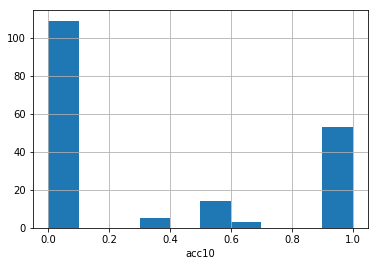

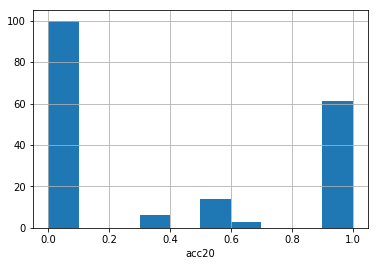

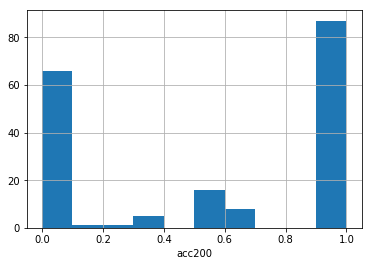

In [15]:
result = evaluate(preds, gold)

ax = result['acc10'].hist()
ax.set_xlabel("acc10")
plt.show()

ax = result['acc20'].hist()
ax.set_xlabel("acc20")
plt.show()

ax = result['acc200'].hist()
ax.set_xlabel("acc200")
plt.show()

# Use MPK rules

In [5]:
fields = ['section', 'class_']

In [6]:
rules = np.load('../data/rules_%s.npy' % '_'.join(fields))
with open('../data/%s_index.pkl' % '_'.join(fields), 'rb') as f:
    columns, index = pickle.load(f)

In [7]:
df = pd.DataFrame(rules, index = index, columns=columns)

In [44]:
preds = {}
for k, doc in tqdm_notebook(test_docs.items()):
    inferred_vector = model.infer_vector(doc, steps=5)
    sims = model.docvecs.most_similar([inferred_vector], topn=model.docvecs.count)
    if k in df:
        valid = df.index[df[k]]
        preds[k] = [_id for _id,score in sims if _id in valid][:201]
    else:
        preds[k] = [_id for _id,score in sims[:201]]    

100%|██████████| 184/184 [00:00<00:00, 22843.03it/s]

median
acc10     0.0
acc20     0.0
acc200    0.5
dtype: float64
mean
acc10     0.289855
acc20     0.344203
acc200    0.495652
dtype: float64


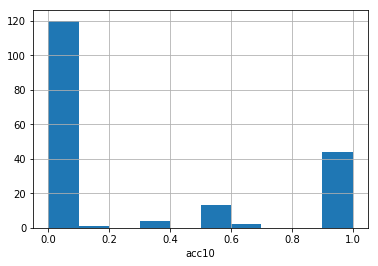

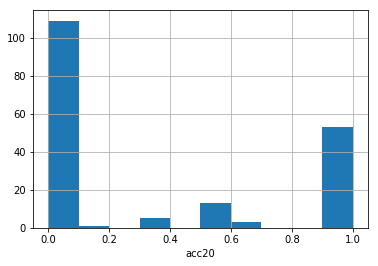

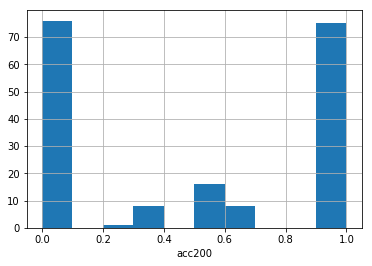

In [45]:
result = evaluate(preds, gold)

ax = result['acc10'].hist()
ax.set_xlabel("acc10")
plt.show()

ax = result['acc20'].hist()
ax.set_xlabel("acc20")
plt.show()

ax = result['acc200'].hist()
ax.set_xlabel("acc200")
plt.show()

In [47]:
# section', 'class_
# acc10     0.279891
# acc20     0.316123
# acc200    0.483152

# section
# acc10     0.289855
# acc20     0.344203
# acc200    0.495652

In [ ]:
test_ids = set(gold.keys() + [vi for v in gold.values() for vi in v])

In [ ]:
folder = join(DATA_FOLDER, 'documents/')

test_docs = {}
fnames = glob(join(folder, '*.json.gz'))
for k,doc in iter_docs(fnames):
    if k in test_ids:
        unlisted = [w for s in doc for w in s]
        test_docs[k] = unlisted

2017-10-07 10:52:19,146 [MainThread  ] [INFO ]  0: ../data/documents/72.json.gz
2017-10-07 10:52:19,237 [MainThread  ] [INFO ]  1: ../data/documents/228.json.gz
2017-10-07 10:52:20,138 [MainThread  ] [INFO ]  2: ../data/documents/791.json.gz
2017-10-07 10:52:20,432 [MainThread  ] [INFO ]  3: ../data/documents/369.json.gz
2017-10-07 10:52:21,729 [MainThread  ] [INFO ]  4: ../data/documents/19.json.gz
2017-10-07 10:52:22,565 [MainThread  ] [INFO ]  5: ../data/documents/483.json.gz
2017-10-07 10:52:22,962 [MainThread  ] [INFO ]  6: ../data/documents/165.json.gz
2017-10-07 10:52:23,085 [MainThread  ] [INFO ]  7: ../data/documents/233.json.gz
2017-10-07 10:52:23,163 [MainThread  ] [INFO ]  8: ../data/documents/299.json.gz
2017-10-07 10:52:23,322 [MainThread  ] [INFO ]  9: ../data/documents/482.json.gz
2017-10-07 10:52:23,495 [MainThread  ] [INFO ]  10: ../data/documents/473.json.gz
2017-10-07 10:52:25,047 [MainThread  ] [INFO ]  11: ../data/documents/117.json.gz
2017-10-07 10:52:25,239 [Mai

2017-10-07 10:55:12,330 [MainThread  ] [INFO ]  101: ../data/documents/535.json.gz
2017-10-07 10:55:13,495 [MainThread  ] [INFO ]  102: ../data/documents/328.json.gz
2017-10-07 10:55:16,879 [MainThread  ] [INFO ]  103: ../data/documents/900.json.gz
2017-10-07 10:55:17,676 [MainThread  ] [INFO ]  104: ../data/documents/656.json.gz
2017-10-07 10:55:23,949 [MainThread  ] [INFO ]  105: ../data/documents/666.json.gz
2017-10-07 10:55:27,023 [MainThread  ] [INFO ]  106: ../data/documents/954.json.gz
2017-10-07 10:55:27,984 [MainThread  ] [INFO ]  107: ../data/documents/860.json.gz
2017-10-07 10:55:30,468 [MainThread  ] [INFO ]  108: ../data/documents/908.json.gz
2017-10-07 10:55:38,063 [MainThread  ] [INFO ]  110: ../data/documents/437.json.gz
2017-10-07 10:55:38,999 [MainThread  ] [INFO ]  111: ../data/documents/962.json.gz
2017-10-07 10:55:39,641 [MainThread  ] [INFO ]  112: ../data/documents/46.json.gz
2017-10-07 10:55:41,585 [MainThread  ] [INFO ]  113: ../data/documents/409.json.gz
2017-

2017-10-07 10:58:20,338 [MainThread  ] [INFO ]  201: ../data/documents/828.json.gz
2017-10-07 10:58:23,035 [MainThread  ] [INFO ]  202: ../data/documents/649.json.gz
2017-10-07 10:58:26,438 [MainThread  ] [INFO ]  203: ../data/documents/603.json.gz
2017-10-07 10:58:29,292 [MainThread  ] [INFO ]  204: ../data/documents/255.json.gz
2017-10-07 10:58:31,272 [MainThread  ] [INFO ]  205: ../data/documents/700.json.gz
2017-10-07 10:58:31,688 [MainThread  ] [INFO ]  206: ../data/documents/471.json.gz
2017-10-07 10:58:32,659 [MainThread  ] [INFO ]  207: ../data/documents/798.json.gz
2017-10-07 10:58:33,247 [MainThread  ] [INFO ]  208: ../data/documents/394.json.gz
2017-10-07 10:58:33,484 [MainThread  ] [INFO ]  209: ../data/documents/58.json.gz
2017-10-07 10:58:34,407 [MainThread  ] [INFO ]  210: ../data/documents/948.json.gz
2017-10-07 10:58:35,416 [MainThread  ] [INFO ]  211: ../data/documents/140.json.gz
2017-10-07 10:58:36,585 [MainThread  ] [INFO ]  212: ../data/documents/493.json.gz
2017-

2017-10-07 11:01:54,748 [MainThread  ] [INFO ]  300: ../data/documents/178.json.gz
2017-10-07 11:01:56,379 [MainThread  ] [INFO ]  301: ../data/documents/819.json.gz
2017-10-07 11:02:04,730 [MainThread  ] [INFO ]  302: ../data/documents/380.json.gz
2017-10-07 11:02:08,261 [MainThread  ] [INFO ]  303: ../data/documents/363.json.gz
2017-10-07 11:02:09,613 [MainThread  ] [INFO ]  304: ../data/documents/848.json.gz
2017-10-07 11:02:10,118 [MainThread  ] [INFO ]  305: ../data/documents/524.json.gz
2017-10-07 11:02:10,713 [MainThread  ] [INFO ]  306: ../data/documents/379.json.gz
2017-10-07 11:02:14,911 [MainThread  ] [INFO ]  307: ../data/documents/895.json.gz
2017-10-07 11:02:17,421 [MainThread  ] [INFO ]  308: ../data/documents/557.json.gz
2017-10-07 11:02:23,140 [MainThread  ] [INFO ]  309: ../data/documents/338.json.gz
2017-10-07 11:02:24,190 [MainThread  ] [INFO ]  310: ../data/documents/176.json.gz
2017-10-07 11:02:25,254 [MainThread  ] [INFO ]  311: ../data/documents/794.json.gz
2017

2017-10-07 11:05:13,793 [MainThread  ] [INFO ]  399: ../data/documents/345.json.gz
2017-10-07 11:05:14,187 [MainThread  ] [INFO ]  400: ../data/documents/319.json.gz
2017-10-07 11:05:15,938 [MainThread  ] [INFO ]  401: ../data/documents/66.json.gz
2017-10-07 11:05:16,369 [MainThread  ] [INFO ]  402: ../data/documents/674.json.gz
2017-10-07 11:05:18,977 [MainThread  ] [INFO ]  403: ../data/documents/244.json.gz
2017-10-07 11:05:22,505 [MainThread  ] [INFO ]  404: ../data/documents/767.json.gz
2017-10-07 11:05:23,992 [MainThread  ] [INFO ]  405: ../data/documents/205.json.gz
2017-10-07 11:05:24,448 [MainThread  ] [INFO ]  406: ../data/documents/277.json.gz
2017-10-07 11:05:27,132 [MainThread  ] [INFO ]  407: ../data/documents/642.json.gz
2017-10-07 11:05:29,081 [MainThread  ] [INFO ]  408: ../data/documents/400.json.gz
2017-10-07 11:05:29,756 [MainThread  ] [INFO ]  409: ../data/documents/521.json.gz
2017-10-07 11:05:30,898 [MainThread  ] [INFO ]  410: ../data/documents/737.json.gz
2017-

2017-10-07 11:08:13,435 [MainThread  ] [INFO ]  498: ../data/documents/496.json.gz
2017-10-07 11:08:14,614 [MainThread  ] [INFO ]  499: ../data/documents/170.json.gz
2017-10-07 11:08:14,805 [MainThread  ] [INFO ]  500: ../data/documents/159.json.gz
2017-10-07 11:08:15,459 [MainThread  ] [INFO ]  501: ../data/documents/902.json.gz
2017-10-07 11:08:15,756 [MainThread  ] [INFO ]  502: ../data/documents/762.json.gz
2017-10-07 11:08:16,010 [MainThread  ] [INFO ]  503: ../data/documents/668.json.gz
2017-10-07 11:08:17,503 [MainThread  ] [INFO ]  504: ../data/documents/404.json.gz
2017-10-07 11:08:17,904 [MainThread  ] [INFO ]  505: ../data/documents/939.json.gz
2017-10-07 11:08:23,908 [MainThread  ] [INFO ]  506: ../data/documents/411.json.gz
2017-10-07 11:08:27,292 [MainThread  ] [INFO ]  507: ../data/documents/658.json.gz
2017-10-07 11:08:34,224 [MainThread  ] [INFO ]  508: ../data/documents/924.json.gz
2017-10-07 11:08:39,455 [MainThread  ] [INFO ]  509: ../data/documents/247.json.gz
2017

2017-10-07 11:11:45,144 [MainThread  ] [INFO ]  597: ../data/documents/904.json.gz
2017-10-07 11:11:45,765 [MainThread  ] [INFO ]  598: ../data/documents/622.json.gz
2017-10-07 11:11:47,825 [MainThread  ] [INFO ]  599: ../data/documents/640.json.gz
2017-10-07 11:11:48,608 [MainThread  ] [INFO ]  600: ../data/documents/919.json.gz
2017-10-07 11:11:55,584 [MainThread  ] [INFO ]  601: ../data/documents/914.json.gz
2017-10-07 11:11:57,882 [MainThread  ] [INFO ]  602: ../data/documents/615.json.gz
2017-10-07 11:12:00,880 [MainThread  ] [INFO ]  603: ../data/documents/73.json.gz
2017-10-07 11:12:01,300 [MainThread  ] [INFO ]  604: ../data/documents/772.json.gz
2017-10-07 11:12:03,553 [MainThread  ] [INFO ]  605: ../data/documents/235.json.gz
2017-10-07 11:12:03,953 [MainThread  ] [INFO ]  606: ../data/documents/621.json.gz
2017-10-07 11:12:05,031 [MainThread  ] [INFO ]  607: ../data/documents/683.json.gz
2017-10-07 11:12:08,616 [MainThread  ] [INFO ]  608: ../data/documents/273.json.gz
2017-

2017-10-07 11:14:57,922 [MainThread  ] [INFO ]  696: ../data/documents/500.json.gz
2017-10-07 11:15:00,702 [MainThread  ] [INFO ]  697: ../data/documents/227.json.gz
2017-10-07 11:15:04,831 [MainThread  ] [INFO ]  698: ../data/documents/514.json.gz
2017-10-07 11:15:07,636 [MainThread  ] [INFO ]  699: ../data/documents/555.json.gz
2017-10-07 11:15:13,869 [MainThread  ] [INFO ]  700: ../data/documents/158.json.gz
2017-10-07 11:15:15,542 [MainThread  ] [INFO ]  701: ../data/documents/436.json.gz
2017-10-07 11:15:15,837 [MainThread  ] [INFO ]  702: ../data/documents/462.json.gz
2017-10-07 11:15:17,419 [MainThread  ] [INFO ]  703: ../data/documents/911.json.gz
2017-10-07 11:15:17,974 [MainThread  ] [INFO ]  704: ../data/documents/378.json.gz
2017-10-07 11:15:20,064 [MainThread  ] [INFO ]  705: ../data/documents/812.json.gz
2017-10-07 11:15:22,420 [MainThread  ] [INFO ]  706: ../data/documents/218.json.gz
2017-10-07 11:15:23,667 [MainThread  ] [INFO ]  707: ../data/documents/508.json.gz
2017

2017-10-07 11:18:13,954 [MainThread  ] [INFO ]  795: ../data/documents/415.json.gz
2017-10-07 11:18:16,840 [MainThread  ] [INFO ]  796: ../data/documents/238.json.gz
2017-10-07 11:18:18,030 [MainThread  ] [INFO ]  797: ../data/documents/8.json.gz
2017-10-07 11:18:19,474 [MainThread  ] [INFO ]  798: ../data/documents/832.json.gz
2017-10-07 11:18:22,047 [MainThread  ] [INFO ]  799: ../data/documents/313.json.gz
2017-10-07 11:18:25,963 [MainThread  ] [INFO ]  800: ../data/documents/596.json.gz
2017-10-07 11:18:27,538 [MainThread  ] [INFO ]  801: ../data/documents/318.json.gz
2017-10-07 11:18:28,394 [MainThread  ] [INFO ]  802: ../data/documents/625.json.gz
2017-10-07 11:18:28,867 [MainThread  ] [INFO ]  803: ../data/documents/804.json.gz
2017-10-07 11:18:30,361 [MainThread  ] [INFO ]  804: ../data/documents/124.json.gz
2017-10-07 11:18:30,590 [MainThread  ] [INFO ]  805: ../data/documents/879.json.gz
2017-10-07 11:18:34,113 [MainThread  ] [INFO ]  806: ../data/documents/455.json.gz
2017-1

2017-10-07 11:22:08,408 [MainThread  ] [INFO ]  894: ../data/documents/580.json.gz
2017-10-07 11:22:09,695 [MainThread  ] [INFO ]  895: ../data/documents/48.json.gz
2017-10-07 11:22:11,129 [MainThread  ] [INFO ]  896: ../data/documents/826.json.gz
2017-10-07 11:22:13,565 [MainThread  ] [INFO ]  897: ../data/documents/513.json.gz
2017-10-07 11:22:16,620 [MainThread  ] [INFO ]  898: ../data/documents/544.json.gz
2017-10-07 11:22:19,648 [MainThread  ] [INFO ]  899: ../data/documents/286.json.gz
2017-10-07 11:22:22,180 [MainThread  ] [INFO ]  900: ../data/documents/581.json.gz
2017-10-07 11:22:22,960 [MainThread  ] [INFO ]  901: ../data/documents/183.json.gz
2017-10-07 11:22:24,478 [MainThread  ] [INFO ]  902: ../data/documents/639.json.gz
2017-10-07 11:22:24,842 [MainThread  ] [INFO ]  903: ../data/documents/208.json.gz
2017-10-07 11:22:25,052 [MainThread  ] [INFO ]  904: ../data/documents/27.json.gz
2017-10-07 11:22:25,143 [MainThread  ] [INFO ]  905: ../data/documents/280.json.gz
2017-1

2017-10-07 11:25:06,600 [MainThread  ] [INFO ]  993: ../data/documents/307.json.gz
2017-10-07 11:25:08,155 [MainThread  ] [INFO ]  994: ../data/documents/171.json.gz
2017-10-07 11:25:08,412 [MainThread  ] [INFO ]  995: ../data/documents/714.json.gz
2017-10-07 11:25:08,705 [MainThread  ] [INFO ]  996: ../data/documents/377.json.gz
2017-10-07 11:25:10,655 [MainThread  ] [INFO ]  997: ../data/documents/452.json.gz
2017-10-07 11:25:10,935 [MainThread  ] [INFO ]  998: ../data/documents/587.json.gz
2017-10-07 11:25:11,648 [MainThread  ] [INFO ]  999: ../data/documents/757.json.gz
2017-10-07 11:25:12,097 [MainThread  ] [INFO ]  1000: ../data/documents/249.json.gz


In [9]:
with open('../data/test_docs.json', 'w') as f:
    json.dump(test_docs, f)

In [8]:
with open('../data/test_docs.json', 'r') as f:
    test_docs = json.load(f)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

stat = []
for k,v in tqdm_notebook(gold.items()):
    q_vector = model.infer_vector(test_docs[k], steps=5)
    ex_vecs = []
    matched = []
    for vi in v:
        doc_vec = model.infer_vector(test_docs[vi], steps=5)
        ex_vecs.append(doc_vec)
        if k in df:
            matched.append(int(df.loc[vi,k]))
        else:
            matched.append(0)
    sim_mat = cosine_similarity([q_vector], ex_vecs)
    stat += list(zip(sim_mat[0], matched))
#     if np.max(sim_mat)>0.8:
#         break

In [12]:
df1 = pd.DataFrame(stat, columns=['cos', 'matched'])

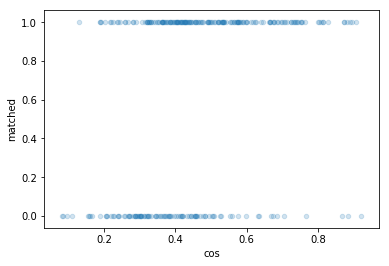

In [13]:
#section, class
df1.plot(kind='scatter', x='cos', y='matched', alpha=0.2)
plt.show()

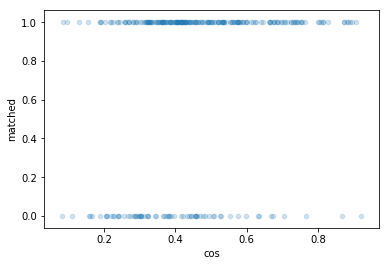

In [12]:
#section
df1.plot(kind='scatter', x='cos', y='matched', alpha=0.2)
plt.show()